<a href="https://colab.research.google.com/github/cleitonmoya/MAE001_Trabalho2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAE001 - Projeto \#2 

MAE001 - Modelagem Matemática em Finanças I \\
Professor: Marco A. Cabral

Alunos:
* Cleiton Moya de Almeida
* Gustaco Maciel Ribeiro
* Renato Santana


## Introdução

## Importação das Séries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.reset_option('display.float_format')
np.set_printoptions(precision=2)
pd.options.display.precision = 2

In [3]:
# Séries financeiras
dir = 'https://raw.githubusercontent.com/cleitonmoya/MAE001_Trabalho2/main/series/'
series = ['IBOV', 'BBDC4', 'ITUB4', 'CSNA3', 'GGBR4', 'B3SA3',
                  'PETR4', 'MGLU3', 'ABEV3', 'WEGE3', 'VIVT4']
url = dir + 'IBOV' + '.csv'

# Cria primeiro um dataframe somente com o IBOV
df = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data', 'Fechamento'], header=0)
df.columns=['IBOV']

# Carrega as demais séries para o dataframe
for _,ativo in enumerate(series):
  url = dir + ativo + '.csv'
  df[ativo] = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data','Fechamento'])

# Ordena o dataframe por data crescente (a fim de permitir correta localização)
df.sort_index(inplace=True) 
df = df.loc['2019-01-01':'2019-12-31'] # período analisado

Visualização das séries importadas:

In [4]:
print(df)

                 IBOV  BBDC4  ITUB4  CSNA3  ...  MGLU3  ABEV3  WEGE3  VIVT4
Data                                        ...                            
2019-01-02   91012.32  28.74  33.18   8.59  ...   5.78  15.80  17.60  41.87
2019-01-03   91564.26  29.03  33.72   8.69  ...   5.72  15.97  18.00  42.24
2019-01-04   91840.80  28.80  33.16   9.09  ...   5.54  16.19  18.20  42.15
2019-01-07   91699.05  29.14  33.22   9.11  ...   5.63  16.12  17.92  42.50
2019-01-08   92031.87  29.32  33.64   9.14  ...   5.58  15.80  17.77  42.60
...               ...    ...    ...    ...  ...    ...    ...    ...    ...
2019-12-20  115121.08  32.13  35.24  13.79  ...  12.13  18.91  33.62  54.29
2019-12-23  115863.29  32.33  35.56  14.51  ...  12.16  18.96  33.55  54.78
2019-12-26  117203.20  32.73  36.10  14.48  ...  12.25  19.22  34.60  55.26
2019-12-27  116533.98  32.61  36.01  13.94  ...  12.16  19.16  35.09  54.87
2019-12-30  115645.34  32.56  35.81  14.09  ...  11.90  18.67  34.41  54.40

[248 rows x

## Questão 1

## Questão 2

* Setor Financeiro:
   * Banco Bradesco (BBDC4);
   * Banco Itaú-Unibanco (ITUB4);
* Setor de Siderurgia:
   * Companhia Siderúrigica Nacional (CSNA3)
   * Grupo Gerdau (GGBR4)
 


Análise de correlação das ações com o IBOV:

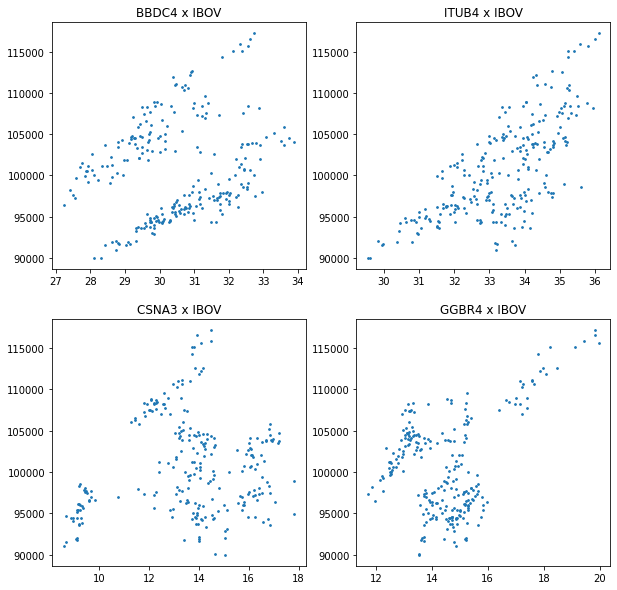

In [5]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].set_title('BBDC4 x IBOV')
axs[0,0].scatter(df.BBDC4, df.IBOV, s=3)

axs[0,1].set_title('ITUB4 x IBOV')
axs[0,1].scatter(df.ITUB4, df.IBOV, s=3)

axs[1,0].set_title('CSNA3 x IBOV')
axs[1,0].scatter(df.CSNA3, df.IBOV, s=3)

axs[1,1].set_title('GGBR4 x IBOV')
axs[1,1].scatter(df.GGBR4, df.IBOV, s=3)
plt.show()

Ativos ativos do mesmo setor:

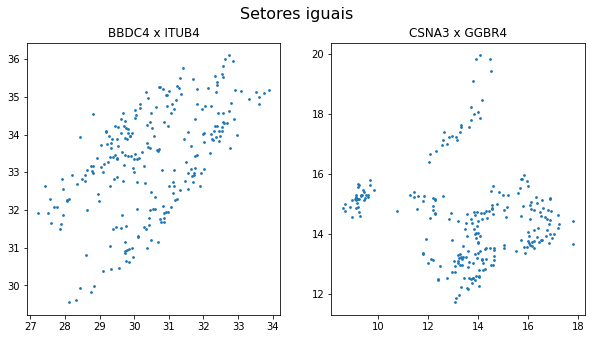

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Setores iguais', fontsize=16)
axs[0].set_title('BBDC4 x ITUB4')
axs[0].scatter(df.BBDC4, df.ITUB4, s=3)

axs[1].set_title('CSNA3 x GGBR4')
axs[1].scatter(df.CSNA3, df.GGBR4, s=3)
plt.show()

Análise de correlação entre as ações:

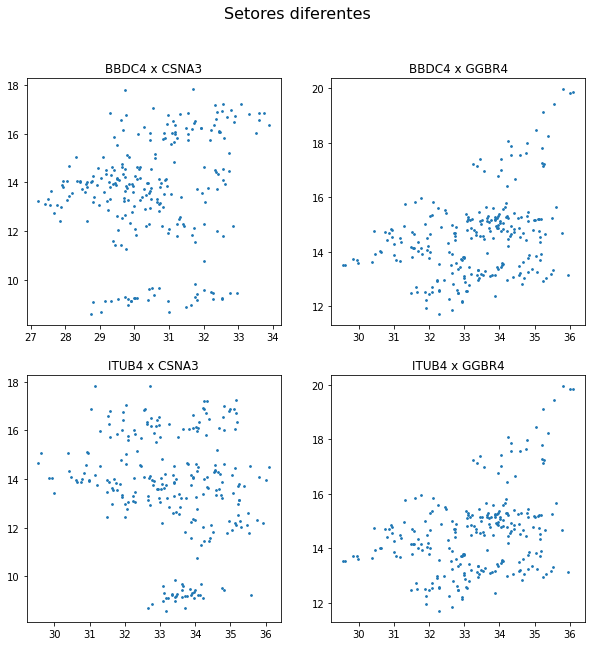

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Setores diferentes', fontsize=16)
axs[0,0].set_title('BBDC4 x CSNA3')
axs[0,0].scatter(df.BBDC4, df.CSNA3, s=3)
axs[0,1].set_title('BBDC4 x GGBR4')
axs[0,1].scatter(df.ITUB4, df.GGBR4, s=3)
axs[1,0].set_title('ITUB4 x CSNA3')
axs[1,0].scatter(df.ITUB4, df.CSNA3, s=3)
axs[1,1].set_title('ITUB4 x GGBR4')
axs[1,1].scatter(df.ITUB4, df.GGBR4, s=3)
plt.show()

Matriz de covariância dos ativos:

In [8]:
print(df.iloc[:,:5].cov())

           IBOV    BBDC4    ITUB4    CSNA3    GGBR4
IBOV   3.38e+07  1901.56  5759.26  1673.92  3207.87
BBDC4  1.90e+03     2.11     1.11     0.54     0.95
ITUB4  5.76e+03     1.11     1.95    -0.56     0.77
CSNA3  1.67e+03     0.54    -0.56     5.18    -0.52
GGBR4  3.21e+03     0.95     0.77    -0.52     2.27


Podemos melhor visualizar através da matriz de correlação plotada na forma de um mapa de calor:

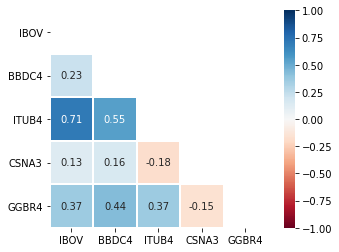

In [9]:
M_Cor = df.iloc[:,:5].corr()
mask = np.triu(np.ones_like(M_Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, annot=True, square=True)
plt.yticks(rotation=0) 
plt.show()

## Questão 3

Ativos escolhidos:
* BBDC4 - Bradesco
* ITUB4 - Itaú-Unibanco
* CSNA3 - CSN
* GGBR4 - Grupo Gerdau
* B3SA3 - B3
* PETR4 - Petrobras
* MGLU3 - Magazine Luíza
* ABEV3 - Ambev
* WEGE3 - WEG
* VIVT4 - Vivo

Índice Sharpe dos ativos:

In [10]:
df_ret = df.pct_change().iloc[1:,1:] # matriz de retornos
df_S = pd.DataFrame(df_ret.mean(), columns=['Retorno'])
df_S['Risco_Std'] = df_ret.std()
df_S['Risco_Var'] = df_ret.var()
df_S['Sharpe'] = df_S.apply(lambda x: x['Retorno']/x['Risco_Std'],axis=1)
#print(df_S.sort_values('Sharpe',ascending=False))
print(df_S)

        Retorno  Risco_Std  Risco_Var  Sharpe
BBDC4  6.39e-04       0.02   2.69e-04    0.04
ITUB4  4.27e-04       0.02   2.38e-04    0.03
CSNA3  2.44e-03       0.03   8.78e-04    0.08
GGBR4  1.38e-03       0.02   3.77e-04    0.07
B3SA3  2.07e-03       0.02   4.56e-04    0.10
PETR4  1.19e-03       0.02   3.26e-04    0.07
MGLU3  3.26e-03       0.03   6.65e-04    0.13
ABEV3  8.13e-04       0.02   2.76e-04    0.05
WEGE3  2.85e-03       0.02   2.58e-04    0.18
VIVT4  1.13e-03       0.01   1.38e-04    0.10


Matriz de covariância:

In [11]:
print(df_ret.cov())

          BBDC4     ITUB4     CSNA3  ...     ABEV3     WEGE3     VIVT4
BBDC4  2.69e-04  2.06e-04  1.04e-04  ...  6.78e-05  1.05e-04  7.92e-05
ITUB4  2.06e-04  2.38e-04  9.00e-05  ...  7.74e-05  1.09e-04  6.36e-05
CSNA3  1.04e-04  9.00e-05  8.78e-04  ...  6.32e-05  6.12e-05  4.65e-05
GGBR4  9.46e-05  9.00e-05  2.71e-04  ...  7.48e-05  9.77e-05  5.60e-05
B3SA3  1.85e-04  1.65e-04  1.16e-04  ...  1.20e-04  1.69e-04  1.15e-04
PETR4  1.45e-04  1.20e-04  1.43e-04  ...  5.59e-05  1.03e-04  5.82e-05
MGLU3  1.31e-04  1.47e-04  1.03e-04  ...  1.10e-04  1.18e-04  1.14e-04
ABEV3  6.78e-05  7.74e-05  6.32e-05  ...  2.76e-04  8.97e-05  4.81e-05
WEGE3  1.05e-04  1.09e-04  6.12e-05  ...  8.97e-05  2.58e-04  6.46e-05
VIVT4  7.92e-05  6.36e-05  4.65e-05  ...  4.81e-05  6.46e-05  1.38e-04

[10 rows x 10 columns]


Matriz de correlação:

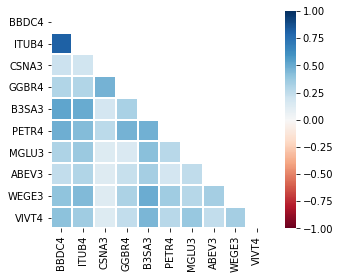

In [12]:
M_Cor2 = df_ret.corr()
mask = np.triu(np.ones_like(M_Cor2, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor2, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True) 
plt.show()

### Gráfico Risco x Retorno

Cálculo da fronteira eficiente:

In [13]:
M_Cov = df_ret.cov().to_numpy()        # Matriz de covariância
R = df_S['Retorno'].to_numpy()         # Retorno de cada ativo carteira

from scipy.optimize import NonlinearConstraint
con = lambda P: P.T@M_Cov@P
nlc = NonlinearConstraint(con, -np.inf, 1.9)

Simulação de carteiras:

In [47]:
# Simulação de carteiras
N_por = 10000 # número de carteiras simuladas
np.random.seed(42)
X = np.array([])
Std = np.array([])
for n in range(N_por):
  P = np.random.dirichlet(np.ones(10))
  P =P/P.sum()
  X = np.append(X, R@P)                         # Retorno das carteiras
  Std = np.append(Std, np.sqrt(P.T@M_Cov@P))    # Risco das carteiras
S = X/Std # Índice Sharpe das Carteiras

Plota a Bala de Markovitw e a Fronteira Eficiente:

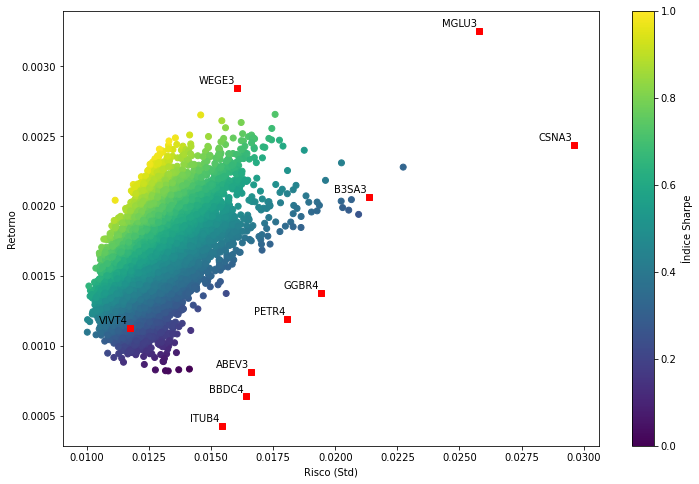

In [48]:
# Plota as carteiras simuladas
plt.figure(figsize=(12,8))
plt.xlabel('Risco (Std)')
plt.ylabel('Retorno')  
plt.scatter(Std, X, c=S, cmap='viridis')

# Plota as carteiras mono-ativo
plt.scatter(df_S.Risco_Std, df_S.Retorno, marker='s', color='r')
plt.colorbar(label='Índice Sharpe')
for label, x, y in zip(series[1:], df_S['Risco_Std'], df_S['Retorno']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

In [42]:
a = np.array([ 0.30220482,  0.86820401,  0.1654503 ,  0.11659149,  0.54323428])
b = a/a.sum()
print(b)
print(b.sum())

[0.15 0.44 0.08 0.06 0.27]
0.9999999999999999


## Questão 4